# Explore offset vector

We want to know what the offset vector is capturing.  Theoretically it should be capturing the "essence of gene A" since it is defined by taking the samples with the highest expression of gene A and the lowest expression of gene A.

We want to test if this offset vector is capturing genes in group A and B

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

randomState = 123
from numpy.random import seed
seed(randomState)

In [2]:
# Load data
base_dir = os.path.join(os.path.dirname(os.getcwd()), "data")
analysis_name = "sim_AB_2775_300_v2"
offset_gene_file = os.path.join(os.path.dirname(os.getcwd()), "data", analysis_name, "offset_gene_space.txt")
offset_vae_file = os.path.join(os.path.dirname(os.getcwd()), "encoded", analysis_name, "offset_latent_space_vae.txt")
A_file = os.path.join(base_dir, analysis_name, "geneSetA.txt")
B_file = os.path.join(base_dir, analysis_name, "geneSetB.txt")
weight_file = os.path.join(os.path.dirname(os.getcwd()), "data", analysis_name, "VAE_weight_matrix.txt")

In [3]:
# Read gene space offset
offset_gene_space = pd.read_table(offset_gene_file, header=0, index_col=0)
offset_gene_space

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
0,0.048716,0.29774,0.26768,0.045651,0.02613,0.000452,-0.087915,0.015366,0.032408,0.09323,...,0.020266,0.056221,0.059724,0.020424,0.022496,-0.086384,-0.020905,0.021258,0.086268,0.093674


In [4]:
# Read VAE space offset
offset_vae_space = pd.read_table(offset_vae_file, header=0, index_col=0)
offset_vae_space

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.50522,0.5764,-2.2113,-0.42799,0.049305,-0.53306,0.000179,-0.18614,-0.6475,0.73362,...,-0.090537,0.14333,-0.12458,0.49669,1.3781,0.051539,0.61496,-0.88544,-0.47793,-0.99904


In [5]:
# Read genes in set A
geneSetA = pd.read_table(A_file, header=0, index_col=0)
geneSetA_ls = [l[0] for l in geneSetA.values.tolist()]
geneSetA_set = set(geneSetA_ls)

In [6]:
# Read genes in set B
geneSetB = pd.read_table(B_file, header=0, index_col=0)
geneSetB_ls = [l[0] for l in geneSetB.values.tolist()]
geneSetB_set = set(geneSetB_ls)

In [7]:
# Read weight matrix
weight = pd.read_table(weight_file, header=0, index_col=0).T
weight.head(5)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
PA0001,-0.117849,-0.038603,0.025833,-0.017812,-0.038917,-0.025886,0.059616,-0.004224,0.061998,-0.104676,...,0.019363,0.007815,-0.052154,0.025949,0.021723,0.055437,-0.018286,0.016438,0.005548,-0.062284
PA0002,-0.475532,-0.376902,-0.292408,-0.443579,-0.275428,-0.237486,-0.131763,-0.309244,-0.123432,-0.239483,...,-0.337239,-0.167598,-0.673273,-0.215697,0.234006,-0.104485,-0.352983,-0.189724,-0.374923,-0.435261
PA0003,-0.028016,-0.147888,-0.118208,-0.176184,0.085006,-0.136751,-0.007269,-0.030653,-0.057265,-0.159458,...,0.029716,-0.110118,-0.190486,-0.035492,-0.083336,-0.039024,-0.120915,0.122573,-0.090189,-0.163588
PA0004,-0.008260,-0.027175,-0.036942,-0.081368,-0.004079,0.048033,-0.006661,0.012838,0.123765,-0.027641,...,0.028078,0.090266,0.021577,-0.017694,0.023099,-0.028170,0.063105,0.006962,0.101481,-0.073981
PA0005,0.056511,0.146070,0.111143,0.195392,0.008957,0.173715,0.095491,0.130729,-0.015219,0.029992,...,-0.012573,0.007769,-0.009655,0.074925,0.057350,0.033258,0.060091,0.037214,-0.054149,0.050110


## Explore gene space offset

1.  What genes are most highly weighted?
2.  What percentage of these genes are in gene set A and B?

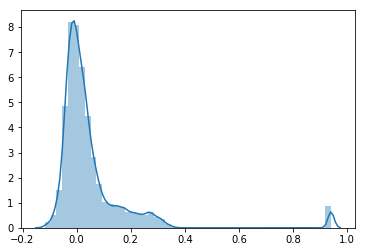

In [8]:
# Distribution of weights in offset vector
sns.distplot(offset_gene_space)

In [9]:
# Get gene ids with the highest weight from the offset vector
percentile = 95
threshold = np.percentile(offset_gene_space, percentile)
print("Threshold cutoff is {}".format(threshold))
highest_genes = offset_gene_space.T[offset_gene_space.T[0] > threshold].index

Threshold cutoff is 0.2661179999999996


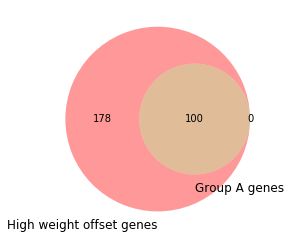

In [10]:
# Compare the overlap of genes in set A and highest weighted genes in offset
venn2([set(highest_genes), geneSetA_set], set_labels = ('High weight offset genes', 'Group A genes'))
plt.show()

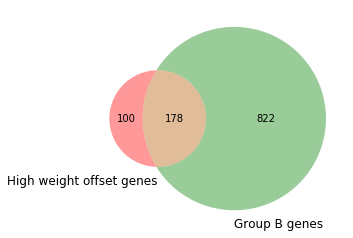

In [11]:
# Compare the overlap of genes in set B and highest weighted genes in offset
venn2([set(highest_genes), geneSetB_set], set_labels = ('High weight offset genes', 'Group B genes'))
plt.show()

## Explore latent space (VAE) offset
1.  Which feature has the highest value?
2.  Are genes in set A and B highly weighted 

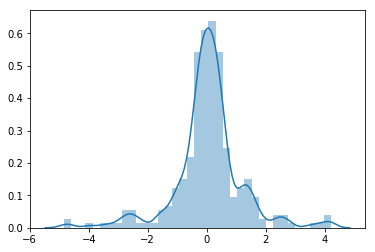

In [12]:
# Distribution of weights in offset vector
sns.distplot(offset_vae_space)

In [13]:
# Get latent feature with the max and min value
max_feature = offset_vae_space.T.idxmax()[0]
min_feature = offset_vae_space.T.idxmin()[0]
print("Max feature is {} and min feature is {}".format(max_feature, min_feature))

Max feature is 106 and min feature is 19


### Genes in feature that corresponds to max offset score

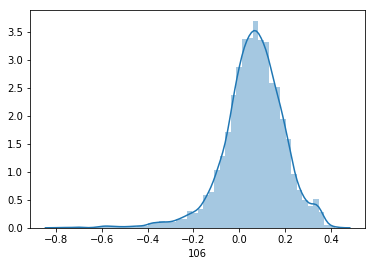

In [14]:
# Get gene weights for max latent feature
genes_max_feature = weight[int(max_feature)]
sns.distplot(genes_max_feature)

In [15]:
# Get gene ids with the highest positive weight from the max feature selected
percentile = 95
threshold = np.percentile(genes_max_feature, percentile)
print("Threshold cutoff is {}".format(threshold))
highest_genes = genes_max_feature[genes_max_feature > threshold].index

Threshold cutoff is 0.2614319205284118


In [16]:
# Get gene ids with the highest negative weight from the max feature selected
percentile = 5
threshold = np.percentile(genes_max_feature, percentile)
print("Threshold cutoff is {}".format(threshold))
lowest_genes = genes_max_feature[genes_max_feature < threshold].index

Threshold cutoff is -0.15282053053379058


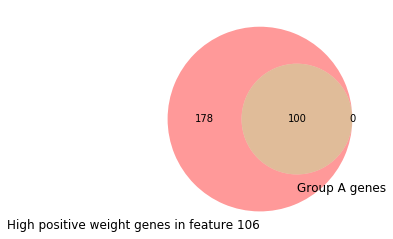

In [17]:
# Compare the overlap of genes in set A and highest positive weighted genes in the max feature
venn2([set(highest_genes), geneSetA_set], set_labels = ('High positive weight genes in feature {}'.format(max_feature), 'Group A genes'))
plt.show()

In [18]:
# Output intersected sets
intersect_highpos_geneA = geneSetA_set.intersection(set(highest_genes))
intersect_highpos_geneA_df = pd.DataFrame(list(intersect_highpos_geneA), columns=['gene id'])

intersect_file = os.path.join(base_dir, analysis_name, "intersect_feature{}_highpos_geneA.txt".format(max_feature))
intersect_highpos_geneA_df.to_csv(intersect_file, sep='\t')

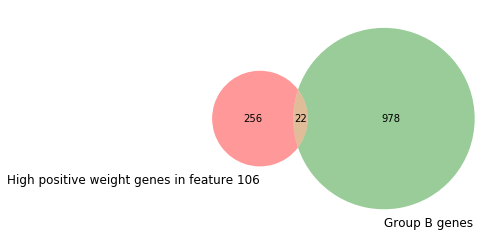

In [19]:
# Compare the overlap of genes in set B and highest positive weighted genes in the max feature
venn2([set(highest_genes), geneSetB_set], set_labels = ('High positive weight genes in feature {}'.format(max_feature), 'Group B genes'))
plt.show()

In [20]:
# Output intersected sets
intersect_highpos_geneB = geneSetB_set.intersection(set(highest_genes))
intersect_highpos_geneB_df = pd.DataFrame(list(intersect_highpos_geneB), columns=['gene id'])

intersect_file = os.path.join(base_dir, analysis_name, "intersect_feature{}_highpos_geneB.txt".format(max_feature))
intersect_highpos_geneB_df.to_csv(intersect_file, sep='\t')

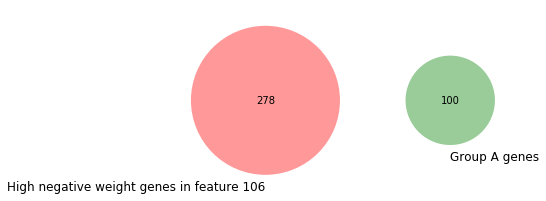

In [21]:
# Compare the overlap of genes in set A and highest negative weighted genes in the max feature
venn2([set(lowest_genes), geneSetA_set], set_labels = ('High negative weight genes in feature {}'.format(max_feature), 'Group A genes'))
plt.show()

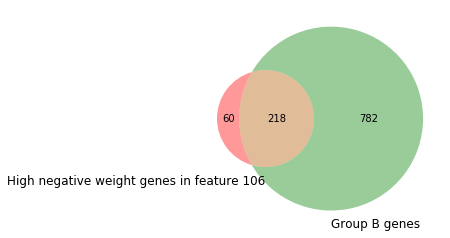

In [22]:
# Compare the overlap of genes in set B and highest negative weighted genes in the max feature
venn2([set(lowest_genes), geneSetB_set], set_labels = ('High negative weight genes in feature {}'.format(max_feature), 'Group B genes'))
plt.show()

In [23]:
# Output intersected sets
intersect_highneg_geneB = geneSetB_set.intersection(set(lowest_genes))
intersect_highneg_geneB_df = pd.DataFrame(list(intersect_highneg_geneB), columns=['gene id'])

intersect_file = os.path.join(base_dir, analysis_name, "intersect_feature{}_highneg_geneB.txt".format(max_feature))
intersect_highneg_geneB_df.to_csv(intersect_file, sep='\t')

### Genes in feature that corresponds to minimum offset score

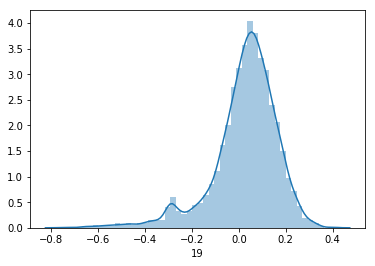

In [24]:
# Get gene weights for min latent feature
genes_min_feature = weight[int(min_feature)]
sns.distplot(genes_min_feature)

In [25]:
# Get gene ids with the highest positive weight from the min feature selected
percentile = 95
threshold = np.percentile(genes_min_feature, percentile)
print("Threshold cutoff is {}".format(threshold))
highest_genes = genes_min_feature[genes_min_feature > threshold].index

Threshold cutoff is 0.2097277015447615


In [26]:
# Get gene ids with the highest negative weight from the min feature selected
percentile = 5
threshold = np.percentile(genes_min_feature, percentile)
print("Threshold cutoff is {}".format(threshold))
lowest_genes = genes_min_feature[genes_min_feature < threshold].index

Threshold cutoff is -0.2704321503639221


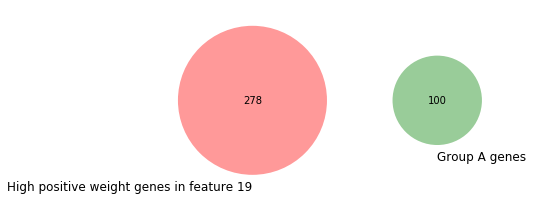

In [27]:
# Compare the overlap of genes in set A and highest positive weighted genes in the min feature
venn2([set(highest_genes), geneSetA_set], set_labels = ('High positive weight genes in feature {}'.format(min_feature), 'Group A genes'))
plt.show()

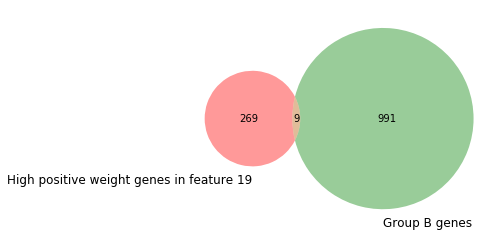

In [28]:
# Compare the overlap of genes in set B and highest positive weighted genes in the min feature
venn2([set(highest_genes), geneSetB_set], set_labels = ('High positive weight genes in feature {}'.format(min_feature), 'Group B genes'))
plt.show()

In [29]:
# Output intersected sets
intersect_highpos_geneB = geneSetB_set.intersection(set(highest_genes))
intersect_highpos_geneB_df = pd.DataFrame(list(intersect_highpos_geneB), columns=['gene id'])

intersect_file = os.path.join(base_dir, analysis_name, "intersect_feature{}_highpos_geneB.txt".format(min_feature))
intersect_highpos_geneB_df.to_csv(intersect_file, sep='\t')

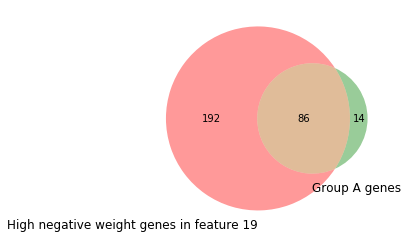

In [30]:
# Compare the overlap of genes in set A and highest negative weighted genes in the min feature
venn2([set(lowest_genes), geneSetA_set], set_labels = ('High negative weight genes in feature {}'.format(min_feature), 'Group A genes'))
plt.show()

In [31]:
# Output intersected sets
intersect_highneg_geneA = geneSetA_set.intersection(set(lowest_genes))
intersect_highneg_geneA_df = pd.DataFrame(list(intersect_highneg_geneA), columns=['gene id'])

intersect_file = os.path.join(base_dir, analysis_name, "intersect_feature{}_highneg_geneA.txt".format(min_feature))
intersect_highneg_geneA_df.to_csv(intersect_file, sep='\t')

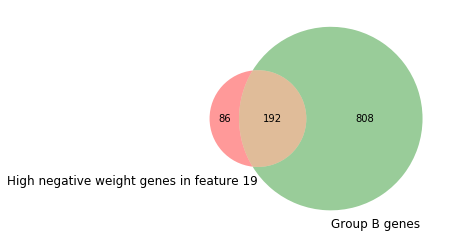

In [32]:
# Compare the overlap of genes in set B and highest negative weighted genes in the min feature
venn2([set(lowest_genes), geneSetB_set], set_labels = ('High negative weight genes in feature {}'.format(min_feature), 'Group B genes'))
plt.show()

In [33]:
# Output intersected sets
intersect_highneg_geneB = geneSetB_set.intersection(set(lowest_genes))
intersect_highneg_geneB_df = pd.DataFrame(list(intersect_highneg_geneB), columns=['gene id'])

intersect_file = os.path.join(base_dir, analysis_name, "intersect_feature{}_highneg_geneB.txt".format(min_feature))
intersect_highneg_geneB_df.to_csv(intersect_file, sep='\t')

Observation:

Notice that the overlap of the high weight genes in the min features and max feature are very similar -- why is this?